In [1]:
import os
os.getcwd()

'C:\\Users\\dubrangala\\OneDrive - VMware, Inc\\Case Studies\\Covid_study'

In [2]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

### Load Covid Data

In [63]:
covid_data = pd.read_csv("covid_data.csv")
covid_data.head(10)

,City,Date,positive cases/ day,recovered cases/day,deaths/day
0,Dakshina Kannada,01-06-2021,536,1172,5
1,Dakshina Kannada,02-06-2021,618,854,5
2,Dakshina Kannada,03-06-2021,598,877,5
3,Dakshina Kannada,04-06-2021,806,858,9
4,Dakshina Kannada,05-06-2021,714,804,8
5,Dakshina Kannada,06-06-2021,609,862,5
6,Dakshina Kannada,07-06-2021,408,676,3
7,Dakshina Kannada,08-06-2021,525,754,5
8,Dakshina Kannada,09-06-2021,594,637,3
9,Dakshina Kannada,10-06-2021,580,625,8


In [64]:
col_names = ['city', 'date', 'positive_case', 'recovered_case', 'deaths']
covid_data.columns = col_names

In [16]:
def plot_var(var='positive_case',
             city='Dakshina Kannada',col='orange'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(city)==str, "Expected string as the state name"
 
    y = covid_data[covid_data['city']==city][var]
    x = covid_data[covid_data['city']==city]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,city),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color=col)
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

#### Distribution of Covid cases for city='Dakshina Kannada'

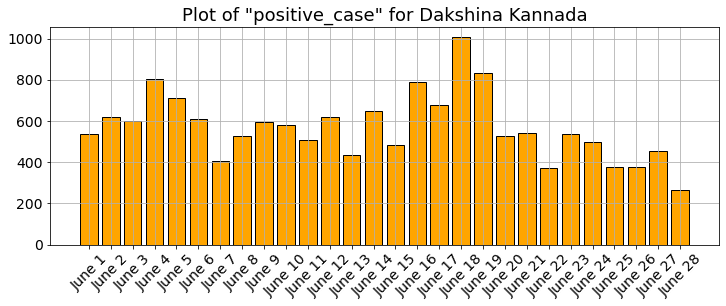

In [12]:
plot_var(var='positive_case', city='Dakshina Kannada')

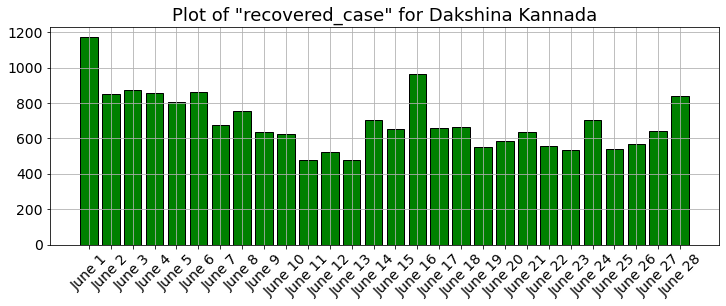

In [17]:
plot_var(var='recovered_case', city='Dakshina Kannada',col='green')

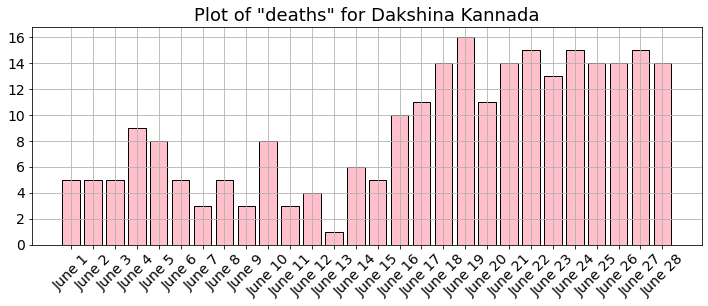

In [18]:
plot_var(var='deaths', city='Dakshina Kannada',col='pink')

#### Distribution of Covid cases for city='Mysuru'

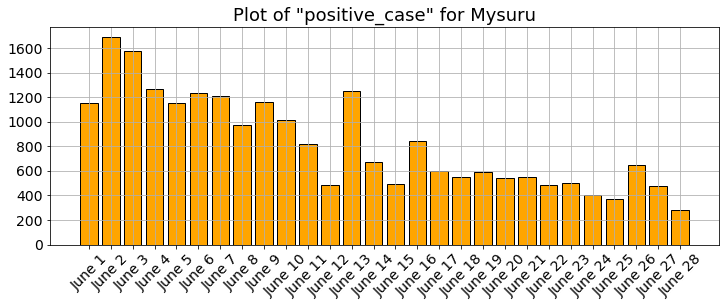

In [19]:
plot_var(var='positive_case', city='Mysuru')

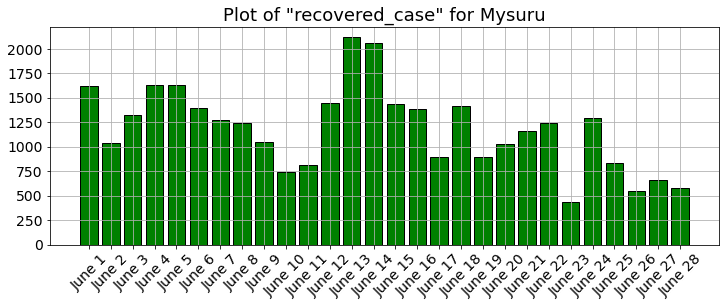

In [20]:
plot_var(var='recovered_case', city='Mysuru', col='green')

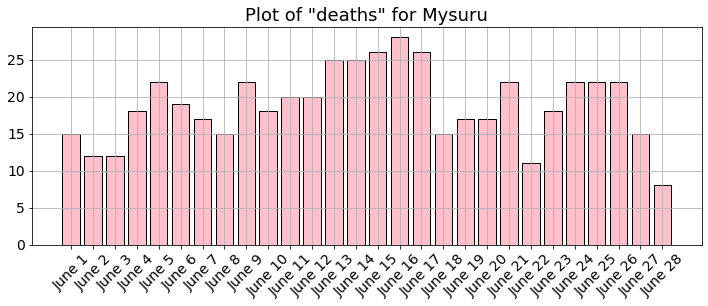

In [21]:
plot_var(var='deaths', city='Mysuru', col='pink')

### Correlation Analysis

In [28]:
def plot_xy(varx='recovered_case',
            vary='positive_case',
            city='Mysuru',
           col='green'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = covid_data[covid_data['city']==city][vary]
    x = covid_data[covid_data['city']==city][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Correlation b/w \"{}\" vs. \"{}\" for {}".format(varx,vary,city),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color=col,s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

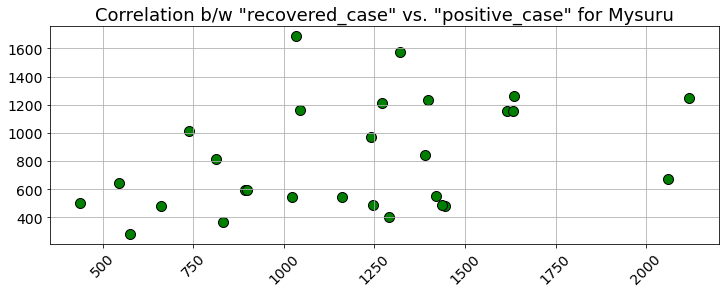

In [29]:
plot_xy(varx='recovered_case',vary='positive_case',city='Mysuru',col='green')

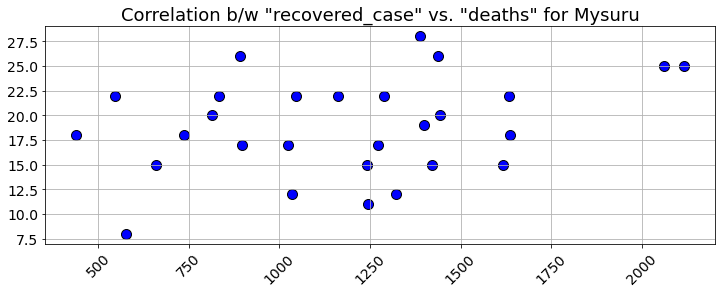

In [31]:
plot_xy(varx='recovered_case',vary='deaths',city='Mysuru',col='blue')

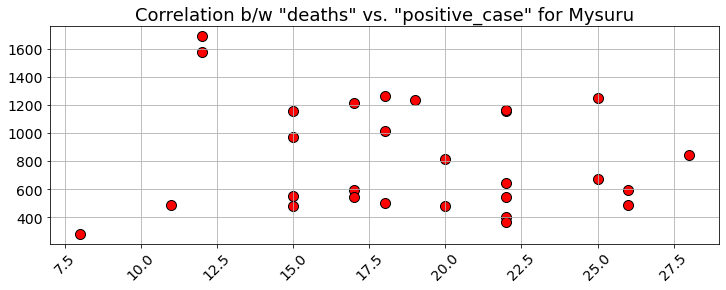

In [32]:
plot_xy(varx='deaths',vary='positive_case',city='Mysuru',col='red')

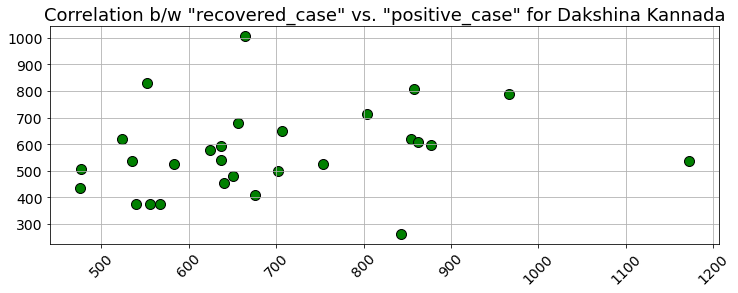

In [33]:
plot_xy(varx='recovered_case',vary='positive_case',city='Dakshina Kannada',col='green')

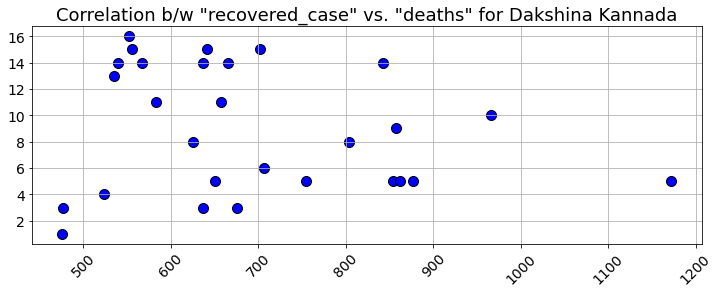

In [34]:
plot_xy(varx='recovered_case',vary='deaths',city='Dakshina Kannada',col='blue')

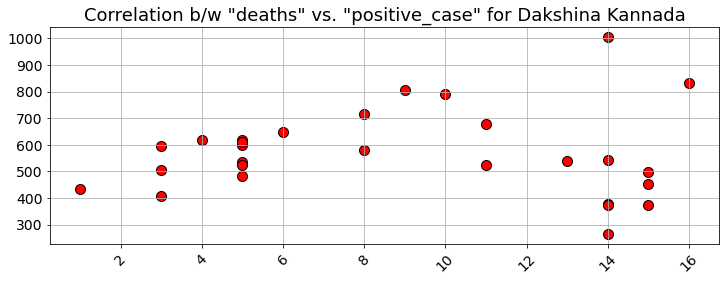

In [35]:
plot_xy(varx='deaths',vary='positive_case',city='Dakshina Kannada',col='red')

In [38]:
corr_dk = covid_data[covid_data.city!='Mysuru'][['positive_case','recovered_case','deaths']].corr()
corr_dk.style.background_gradient(cmap='coolwarm').set_precision(2)

,positive_case,recovered_case,deaths
positive_case,1.00,0.22,0.01
recovered_case,0.22,1.00,-0.17
deaths,0.01,-0.17,1.00


In [39]:
corr_mysuru = covid_data[covid_data.city=='Mysuru'][['positive_case','recovered_case','deaths']].corr()
corr_mysuru.style.background_gradient(cmap='coolwarm').set_precision(2)

,positive_case,recovered_case,deaths
positive_case,1.00,0.37,-0.13
recovered_case,0.37,1.00,0.31
deaths,-0.13,0.31,1.00


Observations:
1. In city Mysuru there is low postive corelation (r=.31) between no. of deaths and no. of recovered cases, similalry with recoverd cases vs positve cases.
2. In city Dakshina Kannada, there is no correlation / low correlation between deaths vs recovered cases vs postive cases

### Significance Test

In [41]:
import researchpy as rp
import scipy.stats as stats

In [44]:
summary, results = rp.ttest(group1= covid_data['positive_case'][covid_data['city'] == 'Mysuru'], group1_name= "Mysuru",
         group2= covid_data['positive_case'][covid_data['city'] == 'Dakshina Kannada'], group2_name= "DK")

In [47]:
summary

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Mysuru,28.0,820.607143,386.406938,73.024047,670.774174,970.440111
1,DK,28.0,568.892857,160.930705,30.413045,506.490444,631.295270
2,combined,56.0,694.750000,319.593051,42.707418,609.162422,780.337578


In [48]:
results

,Independent t-test,results
0,Difference (Mysuru - DK) =,251.7143
1,Degrees of freedom =,54.0000
2,t =,3.1821
3,Two side test p value =,0.0024
4,Difference < 0 p value =,0.9988
5,Difference > 0 p value =,0.0012
6,Cohen's d =,0.8504
7,Hedge's g =,0.8386
8,Glass's delta =,0.6514
9,Pearson's r =,0.3974


Conclusion:
1. The average number of positive cases in city Mysuru, M= 820.60 (670.7, 970.4), was statistically signigicantly higher than positive cases in city DK, M= 568.9 (506.4, 631.29); t(54)= 3.18, p= 0.0024.

In [49]:
summary1, results1 = rp.ttest(group1= covid_data['recovered_case'][covid_data['city'] == 'Mysuru'], group1_name= "Mysuru",
         group2= covid_data['recovered_case'][covid_data['city'] == 'Dakshina Kannada'], group2_name= "DK")

In [50]:
summary1

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Mysuru,28.0,1185.071429,424.264412,80.178437,1020.558864,1349.583993
1,DK,28.0,692.785714,162.547852,30.718657,629.756237,755.815191
2,combined,56.0,938.928571,403.760273,53.954736,830.800864,1047.056279


In [51]:
results1

,Independent t-test,results
0,Difference (Mysuru - DK) =,492.2857
1,Degrees of freedom =,54.0000
2,t =,5.7335
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.5323
7,Hedge's g =,1.5110
8,Glass's delta =,1.1603
9,Pearson's r =,0.6151


Conclusion:
1. The average number of recovered cases in city Mysuru, M= 1185.07 (1020.5, 1349.58), was statistically signigicantly higher than recovered cases in city DK, M= 692.7 (629.75, 755.81); t(54)= 5.73, p= 0.000.

In [52]:
summary2, results2 = rp.ttest(group1= covid_data['deaths'][covid_data['city'] == 'Mysuru'], group1_name= "Mysuru",
         group2= covid_data['deaths'][covid_data['city'] == 'Dakshina Kannada'], group2_name= "DK")

In [53]:
summary2

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Mysuru,28.0,18.892857,4.976532,0.940476,16.963159,20.822555
1,DK,28.0,8.964286,4.756922,0.898974,7.119744,10.808828
2,combined,56.0,13.928571,6.954023,0.929270,12.066272,15.790871


In [54]:
results2

,Independent t-test,results
0,Difference (Mysuru - DK) =,9.9286
1,Degrees of freedom =,54.0000
2,t =,7.6314
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,2.0396
7,Hedge's g =,2.0111
8,Glass's delta =,1.9951
9,Pearson's r =,0.7203


Conclusion:
1. The average number of deaths in city Mysuru, M= 18.9 (16.6, 20.8), was statistically signigicantly higher than deaths in city DK, M= 8.9 (7.1, 10.8); t(54)= 7.6, p= 0.000.

### LINEAR REGRESSION to Predict the deaths

In [55]:
import statsmodels.formula.api as smf

In [60]:
model = smf.ols("deaths ~ positive_case + recovered_case + C(city)", covid_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deaths   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     20.56
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           6.42e-09
Time:                        10:51:32   Log-Likelihood:                -165.66
No. Observations:                  56   AIC:                             339.3
Df Residuals:                      52   BIC:                             347.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.1461      1.877      4.340      0.000       4.380      11.913
C(city)[T.Mysuru]     8.9471      1.654      5.408      0.000       5.627      12.267
positive_case        -0.0026      0.002     -1.105      0.274      -0.007       0.002
recovered_case        0.0033      0.002      1.525      0.133      -0.001       0.008
==============================================================================
Omnibus:                        5.961   Durbin-Watson:                   0.836
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                2.352
Skew:                          -0.100   Prob(JB):                        0.308
Kurtosis:                       2.016   Cond. No.                     3.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusion:

The equation shows that the coefficients for positive_cases and recovered_cases are not statistically significant for the prediction of covid deaths.

### Forecast Covid Death by City = Mysuru

In [61]:
# forecasting model
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA

# for analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [72]:
covid_data.head(2)

,city,date,positive_case,recovered_case,deaths,date_new
date_new,,,,,,
2021-06-01,Dakshina Kannada,01-06-2021,536,1172,5,2021-06-01
2021-06-02,Dakshina Kannada,02-06-2021,618,854,5,2021-06-02


In [67]:
covid_data['date_new']=pd.to_datetime(covid_data.date, format='%d-%m-%Y')

In [71]:
covid_data.index = covid_data['date_new']

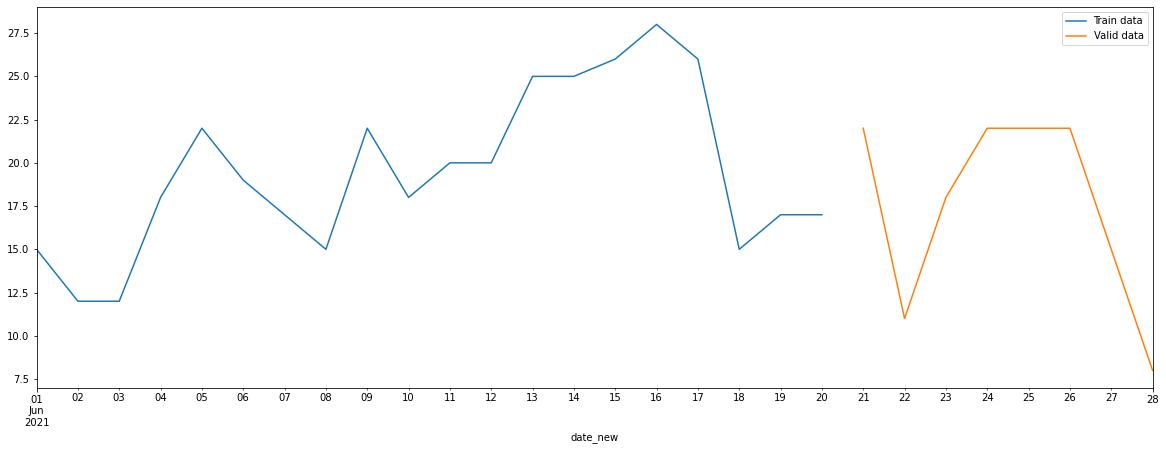

In [73]:
### Split train and validation
train=covid_data[covid_data.city=='Mysuru'].loc['01-06-2021':'20-06-2021']
valid=covid_data[covid_data.city=='Mysuru'].loc['21-06-2021':'28-06-2021']
plt.figure(figsize=(20,7))

train.deaths.plot(label='Train data')
valid.deaths.plot(label='Valid data')
plt.legend(loc='best')

In [81]:
#pip install pmdarima
from pmdarima.arima import auto_arima

In [101]:
## Log Transformation
train_count_log=np.log(train.deaths)
all_data = np.log(covid_data[covid_data.city=='Mysuru'].deaths)


In [105]:
#model = auto_arima(train.deaths, trace=True, error_action='ignore', suppress_warnings=True)
model = auto_arima(train_count_log, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_count_log)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-0.954, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4.125, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2.957, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-0.910, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=102.015, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1.344, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1.230, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=0.802, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.435 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

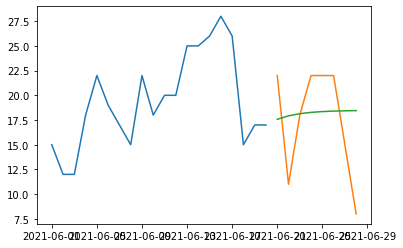

In [108]:
forecast = model.predict(n_periods=len(valid.deaths))
## Reverse transform
forecast=np.exp(forecast)
forecast = pd.DataFrame(forecast,index = valid.deaths.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train.deaths, label='Train')
plt.plot(valid.deaths, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [109]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid.deaths,forecast))
print(rms)

5.3467529096347075


In [110]:
### Forecast for next 5 days
model_all = auto_arima(all_data, trace=True, error_action='ignore', suppress_warnings=True)
model_all.fit(all_data)
forecast_5 = model_all.predict(n_periods=5)
forecast_5 = np.exp(forecast_5)
forecast_5

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=14.840, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13.686, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10.057, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10.769, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=141.371, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11.604, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11.796, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13.453, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.434 seconds


array([11.83788721, 14.41246405, 15.90951853, 16.71899758, 17.1409125 ])

In [111]:
forecast_5

array([11.83788721, 14.41246405, 15.90951853, 16.71899758, 17.1409125 ])

### Forecast Covid Death by City = DK

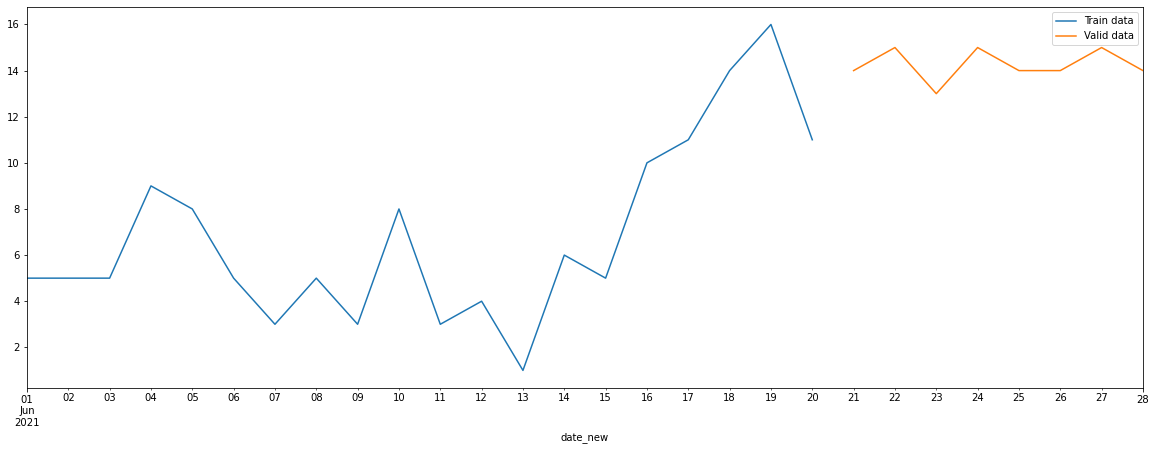

In [112]:
### Split train and validation
train=covid_data[covid_data.city!='Mysuru'].loc['01-06-2021':'20-06-2021']
valid=covid_data[covid_data.city!='Mysuru'].loc['21-06-2021':'28-06-2021']
plt.figure(figsize=(20,7))

train.deaths.plot(label='Train data')
valid.deaths.plot(label='Valid data')
plt.legend(loc='best')

In [113]:
## Log Transformation
train_count_log=np.log(train.deaths)
all_data = np.log(covid_data[covid_data.city!='Mysuru'].deaths)


In [114]:
#model = auto_arima(train.deaths, trace=True, error_action='ignore', suppress_warnings=True)
model_dk = auto_arima(train_count_log, trace=True, error_action='ignore', suppress_warnings=True)
model_dk.fit(train_count_log)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=42.397, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=40.985, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=42.623, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=83.590, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=40.178, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=38.411, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=40.202, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=40.218, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=39.643, Time=0.05 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=42.194, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=43.851, Time=0.04 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.513 seconds


ARIMA(order=(3, 0, 0), scoring_args={}, suppress_warnings=True)

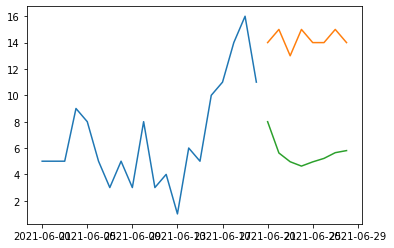

In [115]:
forecast = model_dk.predict(n_periods=len(valid.deaths))
## Reverse transform
forecast=np.exp(forecast)
forecast = pd.DataFrame(forecast,index = valid.deaths.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train.deaths, label='Train')
plt.plot(valid.deaths, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [116]:
rms = sqrt(mean_squared_error(valid.deaths,forecast))
print(rms)

8.731617631130117


In [117]:
### Forecast for next 5 days
model_all_dk = auto_arima(all_data, trace=True, error_action='ignore', suppress_warnings=True)
model_all_dk.fit(all_data)
forecast_5_dk = model_all_dk.predict(n_periods=5)
forecast_5_dk = np.exp(forecast_5_dk)
forecast_5_dk

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=51.904, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=42.900, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=45.816, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=50.018, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=43.789, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=42.864, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=44.858, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=44.838, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=47.381, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=41.167, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=44.440, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=41.353, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=43.147, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=43.097, Time=0.02 sec


array([14.48329671, 14.07785339, 14.41625833, 14.13260048, 14.36952277])

### Forecasted Covid Deaths for next five days 

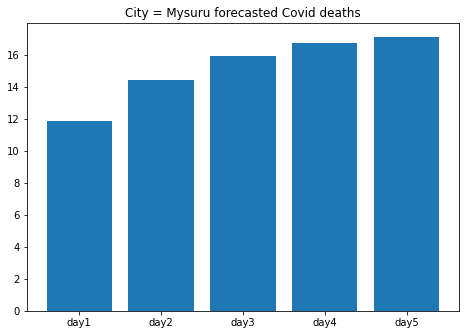

In [122]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = ['day1', 'day2', 'day3', 'day4', 'day5']
students = [23,17,35,29,12]
ax.bar(days,forecast_5)
ax.set_title('City = Mysuru forecasted Covid deaths')
plt.show()

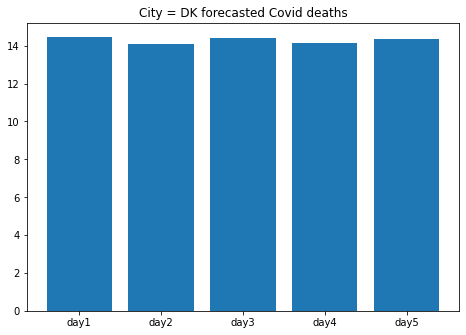

In [123]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = ['day1', 'day2', 'day3', 'day4', 'day5']
students = [23,17,35,29,12]
ax.bar(days,forecast_5_dk)
ax.set_title('City = DK forecasted Covid deaths')
plt.show()

Conclusion:
    
1. Forecasting results says, Covid death increasing in Mysuru and it is stable or decreases at DK. Also it proved from statistical test and regression model
